## Part 1: Align the reads to the human genome

1) Use the bowtie2 hg19 reference human genome database; input reads will be in the /data/lab6/illumina_reads.fastq  
Note: if you use the -un unaligned.fastq option, the unaligned.fastq will contain all reads that didn't align to the human genome (meaning the DNA we want because it contains the bacteria DNA)


Command:

`bowtie2 -p 4 --fast --no-unal -x /data/hg19/hg19 -U /data/lab6/illumina_reads.fastq -S output.sam --un isolated_shewanella.fastq`

**Output:**  
1124714 reads; of these:  
  1124714 (100.00%) were unpaired; of these:  
    1028346 (91.43%) aligned 0 times  
    86808 (7.72%) aligned exactly 1 time  
    9560 (0.85%) aligned >1 times  
8.57% overall alignment rate  

8.57% of the sequencing library came from the contaminating human DNA

## Part 2: Align the isolated_shewanella.fastq to the shewanella genome  

1) Use the bowtie2 commandline to again align to the S. oneidensis MR-1 genome this time. The majority of the dna should align this time and have a higher overall alignment rate output.

> The -un garbage.fastq contains other sources of contamination that are neither human nor bacteria.

Command:

`bowtie2 -p 4 --fast --no-unal -x /data/lab6/shewanella_oneidensis_mr-1 -U isolated_shewanella.fastq -S output2.sam --un garbage.fastq`

**Output2:**  
1028346 reads; of these:  
  1028346 (100.00%) were unpaired; of these:  
    299342 (29.11%) aligned 0 times  
    687579 (66.86%) aligned exactly 1 time  
    41425 (4.03%) aligned >1 times  
70.89% overall alignment rate  

70.89% of the remaining DNA was actually from the bacteria of interest. 29.11% of filtered library didn't align to the reference genome. We used the fast version instead of the very fast for slightly better sensitivity. If we switch to the very sensitive version it gets the following output:

1028346 reads; of these:  
  1028346 (100.00%) were unpaired; of these:  
    298079 (28.99%) aligned 0 times  
    688180 (66.92%) aligned exactly 1 time  
    42087 (4.09%) aligned >1 times  
71.01% overall alignment rate  

It didn't improve by much but the alignment rate is better. Only 28.99% of the data didn't align this time.

## Part 3: Generate a coverage plot of the output2.sam which contains the isolated S. oneidensis sequences

1) convert sam to bam:  
`samtools view -b output2.sam > shewanella.aligned.bam`

2) sort the bam:  
`samtools sort shewanella.aligned.bam > shewanella.aligned.sorted.bam`

3) index the bam:  
`samtools index shewanella.aligned.sorted.bam`

4)  generate a list of coordinates in a genome and the number fo times a read aligned to that position  
`samtools depth -a shewanella.aligned.sorted.bam > coverage.tab`

Min:  0  
Max:  281  
Mean: 37.03830306625343  

5) import the coverage.tab file into this notebook and plot it using matplotlib


In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# parse in the coverage.tab as a dataframe 
df = pd.read_csv('coverage.tab',sep='\t',header=None,names = ["genome","index","coverage"])
# inspect the df
df[0:5]

genome  index  coverage
0  AE014299.2      1         0
1  AE014299.2      2         1
2  AE014299.2      3         2
3  AE014299.2      4         2
4  AE014299.2      5         2

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# get the max, min, and mean of the coverage column
print("max:")
print(np.max(df["coverage"]))
print("min:")
print(np.min(df["coverage"]))
print("mean:")
print(np.mean(df["coverage"]))


max:
281
min:
0
mean:
37.03830306625343


Text(0.5, 0, 'Depth of the Coverage')

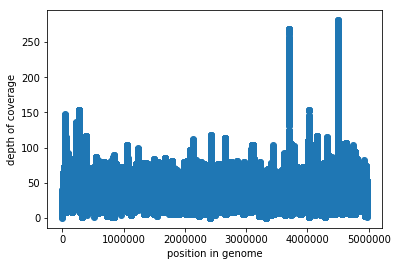

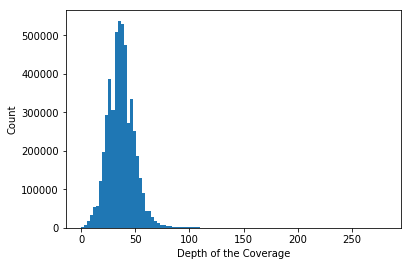

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# plot out the index-coverage scatter plot
index = df["index"]
coverage = df["coverage"]

fig1= plt.figure()
ax = fig1.add_subplot(111)
bar1 = ax.scatter(index, coverage)
plt.ylabel('depth of coverage')
plt.xlabel('position in genome')

# plot out the histogram
fig2= plt.figure()
ax2 = fig2.add_subplot(111)
bar2 = ax2.hist(coverage, bins= 100)
plt.ylabel('Count')
plt.xlabel('Depth of the Coverage')

### Extra Credit 1: To see what sex Jamie is- SPOILER ALERT: MALE

1) determine lengths of all the human chromosomes in base pairs  

from UCSC genome browser:  
    i) chr1: 1- 248956422   
    ii)chr2: 1-242193529  
    iii)chr3: 1- 198295559  
    iv)chr4: 1- 190214555  
    v) chr5: 1- 181538259  
    vi) chr6: 1- 170805979  
    vii) chr 7: 1-159345973  
    viii)chr8: 1- 145138686  
    ix) chr9:1- 138394717  
    x) chr10: 1- 133797422  
    xi) chr11: 1-135086622  
    xii) chr12: 1-133275309  
    xiii) chr13: 1-114364368  
    xiv) chr14: 1-107043718  
    xv) chr 15: 1-101991189  
    xvi) chr16: 1-90338345  
    xvii) chr17: 1-83257441  
    xviii)chr18: 1-80373285  
    XiX)chr19: 1-58617616  
    XX)chr20: 1- 64444167  
    XXi)chr21: 1-46709983  
    XXii)chr22: 1-50818468  
    xxiii)chr x: 1-156040895  
    xxiv)chr y: 1-57227415  
    
    
2) create a coverage_human.tab file to find coverage of each position in the human genome by running all the same commands as above:
`samtools view -b output.sam > human.aligned.bam`

3) sort the bam:  
`samtools sort human.aligned.bam > human.aligned.sorted.bam`

4) index the bam:  
`samtools index human.aligned.sorted.bam`

5)  generate a list of coordinates in a genome and the number fo times a read aligned to that position  
`samtools depth -a human.aligned.sorted.bam > human.tab`

in interest of parsing time, skipped values with a 0 coverage depth

6) read in .tab file as a dataframe and sum over different chromosome lengths to determine total depth for that chromosome
    then divide by length to determine average
    -tab file was too big:caused a memory error
6) ALTERNATIVE:  
create a limited tab file where ignore all values that are 0:
`samtools depth human.aligned.sorted.bam > less_human.tab`
calculate averages manually and plot as a scatter plot (see two code blocks immediately below)

8) plot total depth of coverage plot- again using limited data (ignore all 0 values) so that computer can actually parse it without memory errors



In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import csv

with open('less_human.tab') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter='\t')
    chr1 = 0
    chr2 = 0
    chr3 = 0
    chr4 = 0
    chr5 = 0
    chr6 = 0
    chr7 = 0
    chr8 = 0
    chr9 =0
    chr10 = 0
    chr11= 0
    chr12 = 0
    chr13 = 0
    chr14 = 0
    chr15 = 0
    chr16 = 0
    chr17 = 0
    chr18 = 0
    chr19 = 0
    chr20 =0
    chr21 = 0
    chr22 = 0
    chrX = 0
    chrY = 0
    for row in csv_reader:
        if row[0] == 'chr1':
            chr1 += int(row[2])
        if row[0] == 'chr2':
            chr2 += int(row[2])
        if row[0] == 'chr3':
            chr3 += int(row[2])
        if row[0] == 'chr4':
            chr4 += int(row[2])
        if row[0] == 'chr5':
            chr5 += int(row[2])
        if row[0] == 'chr6':
            chr6 += int(row[2])
        if row[0] == 'chr7':
            chr7 += int(row[2])
        if row[0] == 'chr8':
            chr8 += int(row[2])
        if row[0] == 'chr9':
            chr9 += int(row[2])
        if row[0] == 'chr10':
            chr10 += int(row[2])
        if row[0] == 'chr11':
            chr11 += int(row[2])
        if row[0] == 'chr12':
            chr12 += int(row[2])
        if row[0] == 'chr13':
            chr13 += int(row[2])
        if row[0] == 'chr14':
            chr14 += int(row[2])
        if row[0] == 'chr15':
            chr15 += int(row[2])
        if row[0] == 'chr16':
            chr16 += int(row[2])
        if row[0] == 'chr17':
            chr17 += int(row[2])
        if row[0] == 'chr18':
            chr18 += int(row[2])
        if row[0] == 'chr19':
            chr19 += int(row[2])
        if row[0] == 'chr20':
            chr20 += int(row[2])
        if row[0] == 'chr21':
            chr21 += int(row[2])
        if row[0] == 'chr22':
            chr22 += int(row[2])
        if row[0] == 'chrX':
            chrX += int(row[2])
        if row[0] == 'chrY':
            chrY += int(row[2])
print(chr1)
print(chrX)
print(chrY)

2273514
1509486
244789


[0.009132176554176216, 0.00993520351239442, 0.009933066630100374, 0.00996649809474359, 0.009892394087573574, 0.009915367189810141, 0.009837907858518647, 0.00994432318341369, 0.008723541087193379, 0.009901281954446029, 0.009811052940534703, 0.009892732644123901, 0.008456042882167635, 0.0083338379558154, 0.008096934726390923, 0.00881551460788882, 0.00946391085933088, 0.009399578479341737, 0.0095719007064361, 0.009303215914017478, 0.00753579807554201, 0.006945742638286538, 0.009673656383475627, 0.004277477848684936]


Text(0.5, 0, 'human chromosome number')

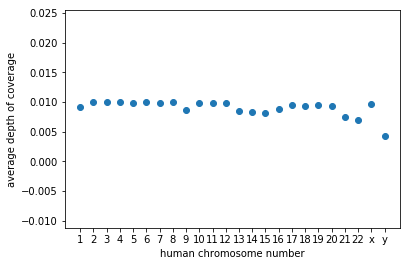

In [8]:
#figure #1:average depth across each chromosome
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import csv
averages = [chr1/248956422, chr2/242193529, chr3/198295559 , chr4/190214555, chr5/181538259, chr6/170805979, chr7/159345973, chr8/145138686, chr9/138394717, chr10/133797422, chr11/135086622, chr12/133275309, chr13/114364368, chr14/107043718, chr15/101991189, chr16/90338345, chr17/83257441, chr18/80373285, chr19/58617616, chr20/64444167, chr21/46709983, chr22/50818468 , chrX/156040895, chrY/57227415]
print(averages)

xaxis= ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','x','y']

fig3= plt.figure()
ax = fig3.add_subplot(111)
bar1 = ax.scatter(xaxis, averages)
plt.ylabel('average depth of coverage')
plt.xlabel('human chromosome number')

Text(0.5, 0, 'Depth of the Coverage')

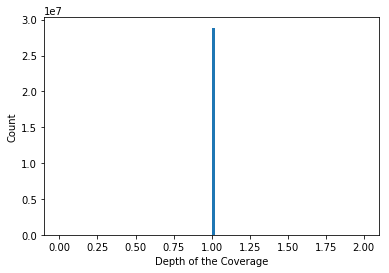

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# parse in the coverage.tab as a dataframe 
df2 = pd.read_csv('less_human.tab',sep='\t',header=None,names = ["chromosome","index","coverage"])
# inspect the df
df2[0:5]
# plot out the histogram
fig4= plt.figure()
ax2 = fig4.add_subplot(111)
bar2 = ax2.hist(df2['coverage'], bins= 100)
plt.ylabel('Count')
plt.xlabel('Depth of the Coverage')

#Because all the 0 values were ignored, only 1 values are remaining. This makes sense considering this is contaminating dna

### Extra Credit 2: To “zoom in” on regions  
1. determine the positions with higher coverage than average
2. extract the sequence from those regions with higher coverage than average
3. BLAST regions

In [96]:
# Determine positions with higher coverage than average
# calculate out the average
average = np.mean(df["coverage"])
# select the index with a coverage larger than average
index = df.index[df.coverage > 2 * average].values
len(index)
# for the filtered indices, connect together the consecutive ones,specifying the start and end position
# filter the strings with less than 100
def make_regions(index):
    start = index[0]
#     print(start)
    end = index[0]
#     print(end)
    pairs = []
    for i in range(1,len(index)):
        if index[i] == end + 1:
            end = index[i]
        else:
            pair = (start,end)
            pairs.append(pair)
            start = index[i]
            end = index[i]
    last_pair = (start,end)
    pairs.append(last_pair)
    
    filtered_pairs = []
    for pair in pairs:
        if abs(pair[0]-pair[1]) > 500:
            filtered_pairs.append(pair)
        else:
            continue
    return filtered_pairs

filtered_pairs = make_regions(index)


In [97]:
# inspect how many regions larger than 500nt and all above average depth are there 
print(len(filtered_pairs))
# inspect the start and end positions
print(filtered_pairs)

16
[(46853, 47600), (49594, 50112), (50238, 50755), (217403, 218288), (219546, 220135), (220224, 221108), (2132226, 2133028), (2656544, 2657210), (3440658, 3441226), (3698977, 3699960), (4027687, 4028426), (4155452, 4156722), (4317040, 4317880), (4319146, 4319721), (4497133, 4497651), (4498477, 4499281)]


### Write a regions.fsa file that include one mapped reads of each region
1. apply the command
`samtools view shewanella.aligned.sorted.bam AE014299.2:start-end | cut -f 10 | head -n 1 `
the command will take the sequence (the field 10 in the sam file) with the corresponding start and end region
2. iterate the above code through a subprocess process and then write them all into a fsa file.

In [100]:
import subprocess
import pandas as pd

# pick a single region 46853, 47600 for demo
p = subprocess.run(['samtools',"view","shewanella.aligned.sorted.bam","AE014299.2:46853-47600"], stdout=subprocess.PIPE, stderr= subprocess.PIPE)
out = p.stdout.decode()
out = str(out)
p1 = subprocess.run(["cut","-f","10"], input = bytes(out, 'ascii'), stdout=subprocess.PIPE, stderr= subprocess.PIPE)
out1 = p1.stdout.decode()
out1
p2 = subprocess.run(["head","-n","1"], input = bytes(out1, 'ascii'), stdout=subprocess.PIPE, stderr= subprocess.PIPE)
out2 = p2.stdout.decode()
out2 


'TACAGAAGAAGGACCGGCTAACTCCGTGCCAGCAGCCGCGGTAATACGGAGGGTCCGAGCGTTAATCGGAATTACTGGGCGTAAAGCGTGCGCAGGCGGTTTGTTAAGCGAGATGTGAAAGCCCTGGGCTCAACCTAGGAATCGCATTTCGAACTGACCAACTAGAGTCTTGTAGAGGGGGGTAGAATTCCAGGTGTAGCGGTGAAATGCGTAGAGATCTGGAGGAATACCGGTGGCAAAGGCGGCCCCCTGGACAAAGACTGACGCTCATGCACGAAAGCGTGGGGAGCAAACAGGATT\n'

As we can see, the reads, that mapped to the specified region will have their sequences in the 9th column

In [72]:
seq = df_out[9][0]
print("mapped sequence to AE014299.2:46853-47600:")
print(seq)

mapped sequence to AE014299.2:46853-47600
TACAGAAGAAGGACCGGCTAACTCCGTGCCAGCAGCCGCGGTAATACGGAGGGTCCGAGCGTTAATCGGAATTACTGGGCGTAAAGCGTGCGCAGGCGGTTTGTTAAGCGAGATGTGAAAGCCCTGGGCTCAACCTAGGAATCGCATTTCGAACTGACCAACTAGAGTCTTGTAGAGGGGGGTAGAATTCCAGGTGTAGCGGTGAAATGCGTAGAGATCTGGAGGAATACCGGTGGCAAAGGCGGCCCCCTGGACAAAGACTGACGCTCATGCACGAAAGCGTGGGGAGCAAACAGGATT


### Iterate through the regions and output a fsa file with all the sequence in fasta format

In [105]:
import subprocess
import pandas as pd

f2 = open("filtered_regions.fsa","w")
for pair in filtered_pairs:
    region = "AE014299.2:" + str(pair[0]) + "-" + str(pair[1])
    p = subprocess.run(['samtools',"view","shewanella.aligned.sorted.bam",region], stdout=subprocess.PIPE, stderr= subprocess.PIPE)
    out = p.stdout.decode()
    p1 = subprocess.run(["cut","-f","10"], input = bytes(out, 'ascii'), stdout=subprocess.PIPE, stderr= subprocess.PIPE)
    out1 = p1.stdout.decode()
    p2 = subprocess.run(["head","-n","1"], input = bytes(out1, 'ascii'), stdout=subprocess.PIPE, stderr= subprocess.PIPE)
    out2 = p2.stdout.decode()
    seq = str(out2)
    print("> mapped sequence to" + region)
    print(seq)    
    f2.write(">" + region + "\n")
    f2.write(seq + "\n")
f2.close()


> mapped sequence toAE014299.2:46853-47600
TACAGAAGAAGGACCGGCTAACTCCGTGCCAGCAGCCGCGGTAATACGGAGGGTCCGAGCGTTAATCGGAATTACTGGGCGTAAAGCGTGCGCAGGCGGTTTGTTAAGCGAGATGTGAAAGCCCTGGGCTCAACCTAGGAATCGCATTTCGAACTGACCAACTAGAGTCTTGTAGAGGGGGGTAGAATTCCAGGTGTAGCGGTGAAATGCGTAGAGATCTGGAGGAATACCGGTGGCAAAGGCGGCCCCCTGGACAAAGACTGACGCTCATGCACGAAAGCGTGGGGAGCAAACAGGATT

> mapped sequence toAE014299.2:49594-50112
GGTGAGGCCGAAAGGCGTAATCGATGGGAAACAGATTAATATTTCTGTACTTTTGCTAACTGCGATGGAGAGACGGAGAAGGCTAGGCTAGCGCGGCGTTGGTAGTCCGCGTTTAAGGTGGTAGGTGGGTGACTTAGGCAAATCCGGGTCACTATACACTGAGAGCTGATGACGAGTCCCCAAGGGGATGAAGTAGTTGATGCCATGCTTCCAGGAAAATCTTCTAAGCTTCAGGTTAGTAGGAATCGTACCCCAAACCGACACAGGTGGTCGGGTAGAGAATACCAAGGCGCTTGAG

> mapped sequence toAE014299.2:50238-50755
TGAAGTTGAAATTGCGGTGAAGATGCCGTATACCCGCGGCTAGACGGAAAGACCCCGTGAAACTTTACTATAGCTTGGCACTGAACATTGACCCTACATGTGTAGGATAGGTGGGAGACTTTGAAGTTGGAACGCTAGTTCTGATGGAGTCGTCCTTGAAATACCACCCTTGTAGTGTTAATGTTATAACATGGCCCCATTATATGGGGTAAAAACAGTGCCTGGTGGGTAGTTTGACTGGGGCAGTCTCCTCCCAAAGAGTAAAGAAG

### BLAST result from the server (select the max score hit for each region for the MR-1 strain)
1. https://www.ncbi.nlm.nih.gov/nucleotide/MH539606.1?report=genbank&log$=nuclalign&blast_rank=1&RID=UY9A4NR9015&from=272&to=571
/gene="rrsA"
/locus_tag="SO_r001"
/product="16S ribosomal RNA"

2. https://www.ncbi.nlm.nih.gov/nucleotide/AE014299.2?report=genbank&log$=nuclalign&blast_rank=1&RID=UY9A4NR9015&from=49305&to=49602
AE014299 
/gene="rrlA"
/locus_tag="SO_r002"

3. https://www.ncbi.nlm.nih.gov/nucleotide/NR_076190.1?report=genbank&log$=nuclalign&blast_rank=1&RID=UY9A4NR9015&from=2001&to=2300
/gene="rrlA"
/locus_tag="SO_r002"
/product="23S ribosomal RNA"

4. https://www.ncbi.nlm.nih.gov/nucleotide/MH160656.1?report=genbank&log$=nuclalign&blast_rank=1&RID=UY9A4NR9015&from=119&to=418
/gene="rrsB"
/locus_tag="SO_r004"
/product="16S ribosomal RNA"

5. https://www.ncbi.nlm.nih.gov/nucleotide/AE014299.2?report=genbank&log$=nuclalign&blast_rank=2&RID=UY9A4NR9015&from=219255&to=219553
/gene="rrlB"
/locus_tag="SO_r005"
/product="23S ribosomal RNA"

6. https://www.ncbi.nlm.nih.gov/nucleotide/AE014299.2?report=genbank&log$=nuclalign&blast_rank=1&RID=UY9A4NR9015&from=48935&to=49233
/gene="rrlA"
/locus_tag="SO_r002"
/product="23S ribosomal RNA"

7. https://www.ncbi.nlm.nih.gov/nucleotide/AE014299.2?report=genbank&log$=nuclalign&blast_rank=1&RID=UY9A4NR9015&from=1586614&to=1586912
/gene="tnpA"
/locus_tag="SO_1511"

8. https://www.ncbi.nlm.nih.gov/nucleotide/AE014299.2?report=genbank&log$=nuclalign&blast_rank=1&RID=UY9A4NR9015&from=2656250&to=2656549
/gene="tnpA"
/locus_tag="SO_2527"

9. https://www.ncbi.nlm.nih.gov/nucleotide/AE014299.2?report=genbank&log$=nuclalign&blast_rank=1&RID=UY9A4NR9015&from=3440362&to=3440660
/gene="tnpA"
/locus_tag="SO_3296"

10. https://www.ncbi.nlm.nih.gov/nucleotide/AE014299.2?report=genbank&log$=nuclalign&blast_rank=1&RID=UY9A4NR9015&from=3698710&to=3699008
/gene="tnpA"
/locus_tag="SO_3543"

11. https://www.ncbi.nlm.nih.gov/nucleotide/AE014299.2?report=genbank&log$=nuclalign&blast_rank=1&RID=UY9A4NR9015&from=4027416&to=4027708
/gene="tnpA"
/locus_tag="SO_3880"

12. https://www.ncbi.nlm.nih.gov/nucleotide/AE014299.2?report=genbank&log$=nuclalign&blast_rank=1&RID=UY9A4NR9015&from=4155155&to=4155453
/locus_tag="SO_4013"
/product="TPR repeat domain protein"

13. https://www.ncbi.nlm.nih.gov/nucleotide/AE014299.2?report=genbank&log$=nuclalign&blast_rank=1&RID=UY9A4NR9015&from=4316767&to=4317055
/product = secreted VCBS domain protein
/locus_tag="SO_4149"

14. https://www.ncbi.nlm.nih.gov/nucleotide/AE014299.2?report=genbank&log$=nuclalign&blast_rank=1&RID=UY9A4NR9015&from=4318848&to=4319147
/locus_tag="SO_4149"
/product="secreted VCBS domain protein"

15. https://www.ncbi.nlm.nih.gov/nucleotide/AE014299.2?report=genbank&log$=nuclalign&blast_rank=1&RID=UY9A4NR9015&from=4496850&to=4497139
/gene="bpfA"
/locus_tag="SO_4317"

16. https://www.ncbi.nlm.nih.gov/nucleotide/AE014299.2?report=genbank&log$=nuclalign&blast_rank=1&RID=UY9A4NR9015&from=4498181&to=4498480
/gene="bpfA"
/locus_tag="SO_4317"
